<a href="https://colab.research.google.com/github/Rabiya-k/Linear-Regression--Startup-dataset/blob/main/ML_Task1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To Predict the profit madeby a startup on the basis of expenses incurred and the state where they operate

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset

startups = pd.read_csv('/content/drive/MyDrive/50_Startups.csv')

In [ ]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#Basic details

startups.shape

(50, 5)

In [ ]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
#Checking the missing values
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Text(0.5, 1.0, 'Scatter plot of R&D Spend vs Profit')

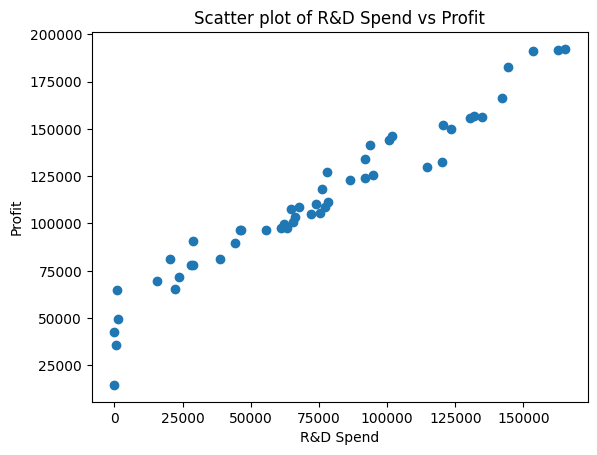

In [ ]:
# Vizualization
# Scatter plot of R&D spends vs Profit
x = startups['R&D Spend']
y = startups['Profit']
plt.scatter(x,y)

plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Scatter plot of R&D Spend vs Profit')

Text(0.5, 1.0, 'Scatter plot of Marketing Spend vs Profit')

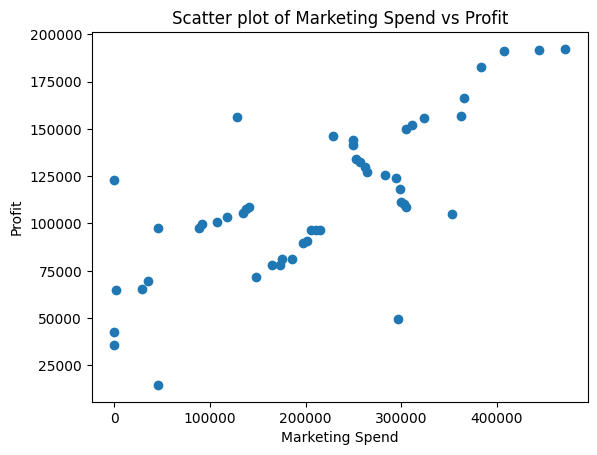

In [ ]:
# Scatter plot of Marketing spends vs Profit

x = startups['Marketing Spend']
y = startups['Profit']
plt.scatter(x,y)

plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Scatter plot of Marketing Spend vs Profit')

Text(0.5, 1.0, 'Scatter plot of Administration vs Profit')

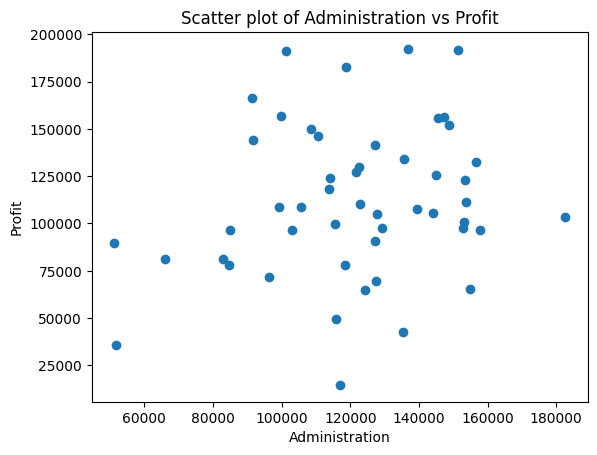

In [ ]:
# Scatter plot of Administration vs Profit

x = startups['Administration']
y = startups['Profit']
plt.scatter(x,y)

plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Scatter plot of Administration vs Profit')

Text(0.5, 1.0, 'Bar plot of State vs Profit')

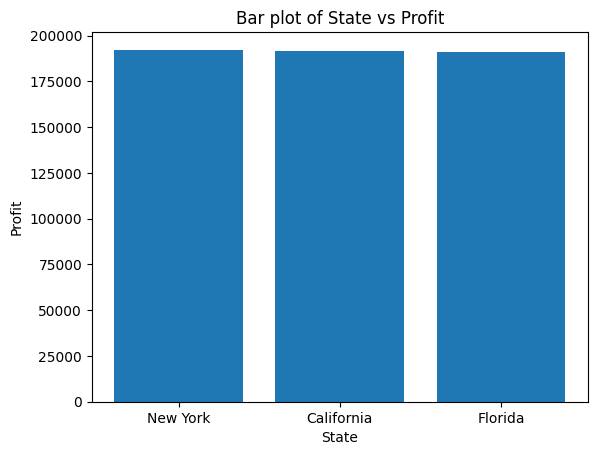

In [ ]:
# Bar plot of state vs Profit

x = startups['State']
y = startups['Profit']
plt.bar(x,y)

plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Bar plot of State vs Profit')

In [ ]:
startups['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
startups.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
#Label encoding
#create dummy columns of state as NewYork, California &	Florida

startups['New_York'] =np.where(startups['State'] == "New York", 1, 0)
startups['California'] = np.where(startups['State'] == "California", 1, 0)
startups['Florida'] = np.where(startups['State'] == "Florida", 1, 0)

In [ ]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,New_York,California,Florida
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [ ]:
#Drop the  original column state from the dataframe

startups.drop(columns=['State'], axis=1, inplace =True)

In [ ]:
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,New_York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
##Split the dataset as dpendent variable(y) & independen variable(x)

#y = startups['Profit']
#y.head()

In [ ]:
#x = startups
#x.head()

In [ ]:
dependent_variable = 'Profit'

In [ ]:
# Create a list of independent variables

independent_variable = list(set(startups.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variable

['California',
 'R&D Spend',
 'Marketing Spend',
 'Administration',
 'Florida',
 'New_York']

In [ ]:
y = startups[dependent_variable].values

In [ ]:
x = startups[independent_variable].values

In [ ]:
startups[independent_variable]

,California,R&D Spend,Marketing Spend,Administration,Florida,New_York
0,0,165349.20,471784.10,136897.80,0,1
1,1,162597.70,443898.53,151377.59,0,0
2,0,153441.51,407934.54,101145.55,1,0
3,0,144372.41,383199.62,118671.85,0,1
4,0,142107.34,366168.42,91391.77,1,0
5,0,131876.90,362861.36,99814.71,0,1
6,1,134615.46,127716.82,147198.87,0,0
7,0,130298.13,323876.68,145530.06,1,0
8,0,120542.52,311613.29,148718.95,0,1
9,1,123334.88,304981.62,108679.17,0,0


In [ ]:
x

array([[0.0000000e+00, 1.6534920e+05, 4.7178410e+05, 1.3689780e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.6259770e+05, 4.4389853e+05, 1.5137759e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.5344151e+05, 4.0793454e+05, 1.0114555e+05,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.4437241e+05, 3.8319962e+05, 1.1867185e+05,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.4210734e+05, 3.6616842e+05, 9.1391770e+04,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.3187690e+05, 3.6286136e+05, 9.9814710e+04,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.3461546e+05, 1.2771682e+05, 1.4719887e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.3029813e+05, 3.2387668e+05, 1.4553006e+05,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.2054252e+05, 3.1161329e+05, 1.4871895e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.2333488e+05,

In [ ]:
#Splitting the dataset into the train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train[:10]

array([[0.0000000e+00, 5.5493950e+04, 2.1463481e+05, 1.0305749e+05,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.6014020e+04, 2.0551764e+05, 8.5047440e+04,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 7.5328870e+04, 1.3405007e+05, 1.4413598e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.6426070e+04, 2.1079767e+05, 1.5769392e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.1749160e+04, 2.9491957e+05, 1.1417579e+05,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.3029813e+05, 3.2387668e+05, 1.4553006e+05,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.1994324e+05, 2.5651292e+05, 1.5654742e+05,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0002300e+03, 1.9039300e+03, 1.2415304e+05,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 5.4205000e+02, 0.0000000e+00, 5.1743150e+04,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 6.5605480e+04,

In [ ]:
#Scaling

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train[:10]

array([[0.        , 0.33561668, 0.45494286, 0.48655174, 1.        ,
        0.        ],
       [0.        , 0.2782839 , 0.43561799, 0.3173015 , 0.        ,
        1.        ],
       [0.        , 0.45557444, 0.28413435, 0.87258866, 1.        ,
        0.        ],
       [1.        , 0.2807759 , 0.44680961, 1.        , 0.        ,
        0.        ],
       [0.        , 0.55488118, 0.62511553, 0.59103645, 1.        ,
        0.        ],
       [0.        , 0.7880179 , 0.68649342, 0.88568959, 1.        ,
        0.        ],
       [0.        , 0.72539353, 0.54370828, 0.98922572, 1.        ,
        0.        ],
       [0.        , 0.0060492 , 0.0040356 , 0.6847981 , 0.        ,
        1.        ],
       [0.        , 0.00327821, 0.        , 0.00432296, 0.        ,
        1.        ],
       [0.        , 0.39676926, 0.22709197, 0.95618996, 0.        ,
        1.        ]])

In [ ]:
#Fitting Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.9507524843355148

In [ ]:
#Fitting Linear Regression on train data

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)

0.9501847627493607

In [ ]:
reg.coef_

array([ 8.66383692e+01,  1.27892182e+05,  1.72720281e+04,  3.49927567e+03,
       -8.72645791e+02,  7.86007422e+02])

In [ ]:
reg.intercept_

44153.9546678486

In [ ]:
#Actual profit on train data

y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [ ]:
#predicted profit of train data

y_predict_train = reg.predict(x_train)
y_predict_train

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [ ]:
#Actual Profit on test data

y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
#predicted profit of test data

y_predict = reg.predict(x_test)
y_predict

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [ ]:
#Mean Sqared Error

mean_squared_error(y_train, y_predict_train)

81571001.8007737

In [ ]:
mean_squared_error(y_test, y_predict)

83502864.03257735

In [ ]:
# Train performance

math.sqrt(mean_squared_error(y_train, y_predict_train))

9031.66661257897

In [ ]:
# Test performance

math.sqrt(mean_squared_error(y_test, y_predict))

9137.990152794944

In [ ]:
#R2 Score

r2_score(y_train, y_predict_train)

0.9501847627493607

In [ ]:
r2_score(y_test, y_predict)

0.9347068473282425